In [132]:
# importing Library for the adding csv file.
import pandas as pd
import numpy as np
import time

In [2]:
heart_data = pd.read_csv("Data/heart.csv")

In [3]:
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
print(heart_data.describe())

              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [11]:
print(heart_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [50]:
print(f" Output(1 = Heart attack and 0 = not  )  Count \n{ heart_data['output'].value_counts() }")
print(f"\n\n Gender(0 = male and 1 = female)  Count \n{ heart_data['sex'].value_counts() }")

# print((heart_data['age'].sort_values()).value_counts())


 Output(1 = Heart attack and 0 = not  )  Count 
1    165
0    138
Name: output, dtype: int64


 Gender(0 = male and 1 = female)  Count 
1    207
0     96
Name: sex, dtype: int64


In [55]:
print('Female vs Male Heart attack count')
print("\nFemale Value Counts: \n{}".format(heart_data[heart_data['sex'] == 1]['output'].value_counts()))
print("\n\nMale Value Counts: \n{}".format(heart_data[heart_data['sex'] == 0]['output'].value_counts()))

Female vs Male Heart attack count

Female Value Counts: 
0    114
1     93
Name: output, dtype: int64


Male Value Counts: 
1    72
0    24
Name: output, dtype: int64


In [20]:
# Importing liberary for the Visulization

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

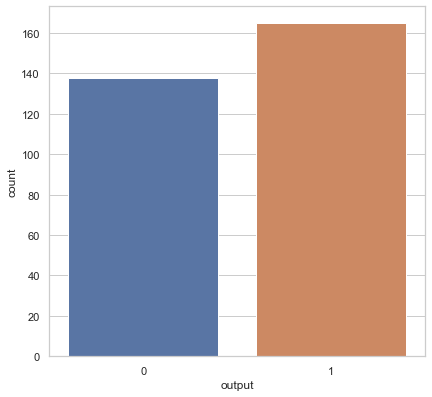

In [27]:
# Count plot of Output(Heart Attack or not)
fig = plt.figure(figsize=(6,6))
sns.set_theme(style = "whitegrid")
sns.countplot(data = heart_data, x = "output")
plt.show()

Based on this calculation and the survey by harvard researchers, they conclude that the sex label "0" in the dataset is for male whereas the label "1" is for females

In [37]:
# fig = plt.figure(figsize=(6,6))
# sns.set_theme(style = "whitegrid")
# sns.countplot(data = heart_data, x = "sex")
# plt.show()

# Pie Chart of Male vs female in Total dataset (her male = 0 and Female = 1)
ax = px.pie(heart_data, names = "sex", title = "output")
ax.show()

In [45]:
print(f'Percentage of high risk(1) for heart attack =  {format(round((len(heart_data[heart_data["output"]==1])/len(heart_data)*100),2))} %')
print(f'average age of High risk of heart attack  {format(round(heart_data[heart_data["output"]==1]["age"].mean()))}')

Percentage of high risk(1) for heart attack =  54.46 %
average age of High risk of heart attack  52


In [44]:
print(f'Percentage of high risk(1) for heart attack =  {format(round((len(heart_data[heart_data["output"]==0])/len(heart_data)*100),2))} %')
print(f'average age of High risk of heart attack  {format(round(heart_data[heart_data["output"]==0]["age"].mean()))}')

Percentage of high risk(1) for heart attack =  45.54 %
average age of High risk of heart attack  57


In [73]:
female_heart_data = heart_data[heart_data["sex"]==1].reset_index()  
male_heart_data= heart_data[heart_data["sex"]==0].reset_index() 
print(female_heart_data.shape)
print(male_heart_data.shape)

(207, 15)
(96, 15)


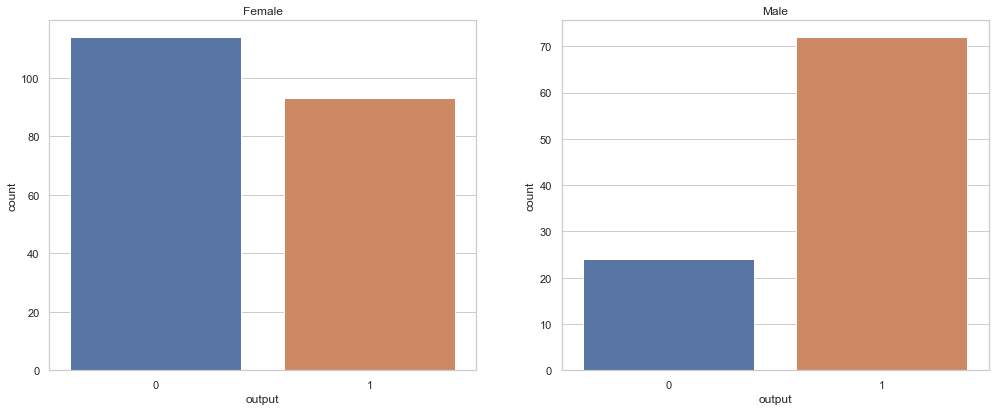

In [77]:


fig, ax1 = plt.subplots(1, 2, figsize = (15,6))
sns.countplot(ax=ax1[0], data=female_heart_data, x= 'output')
ax1[0].set_title("Female")
sns.countplot(ax=ax1[1], data=male_heart_data, x = 'output')
ax1[1].set_title("Male")
plt.show()

since the label "0" is more prone to having an heart attack.

C:\Users\Krupesh\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



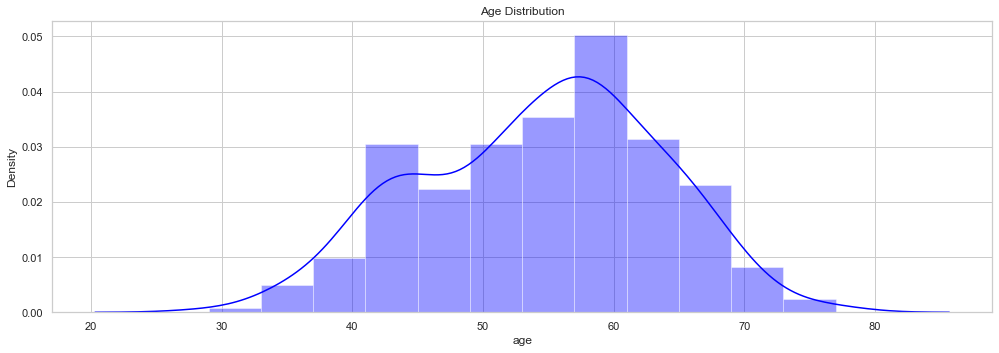

In [84]:
plt.figure(figsize=(15,5))
sns.distplot(heart_data["age"],color= "blue",bins="auto")
plt.title("Age Distribution")
plt.show()

<AxesSubplot:>

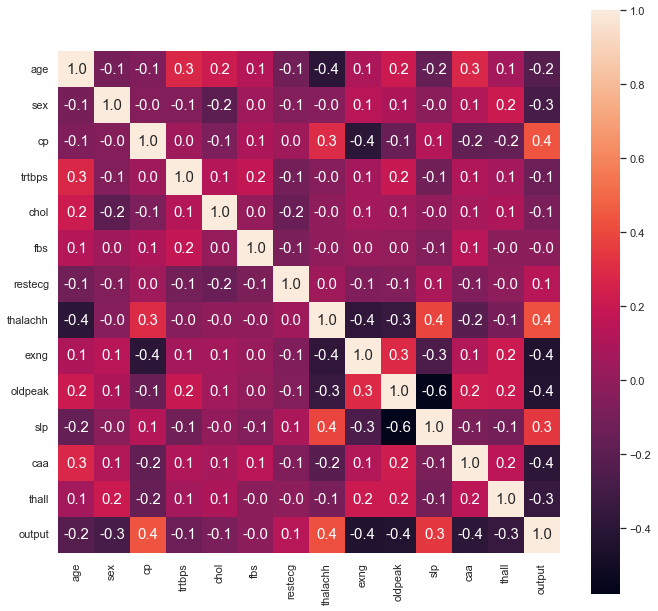

In [91]:
corr = heart_data.corr()
corr.shape
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15})

exng        0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
caa         0.391724
slp         0.345877
thall       0.344029
sex         0.280937
age         0.225439
trtbps      0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: output, dtype: float64


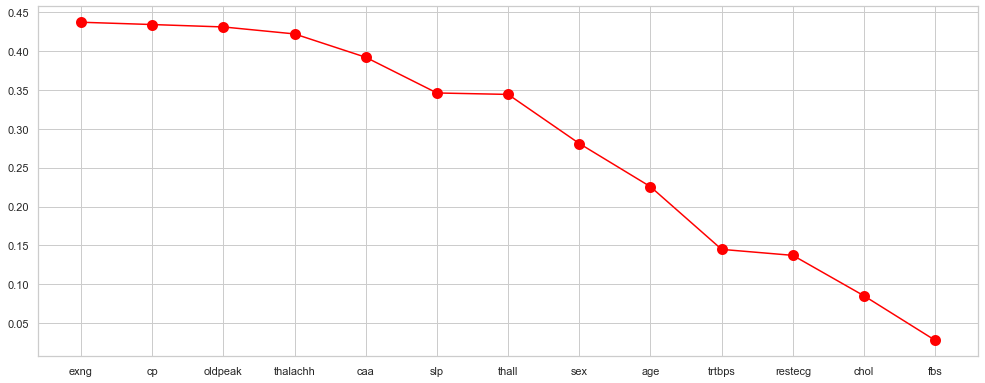

In [92]:
C=abs(corr["output"]).sort_values(ascending=False)[1:]
print(C)
plt.figure(figsize=(15,6))
plt.plot(C.index,C,color="red")
plt.scatter(C.index,C,color="red",lw=5)
plt.show()

Here i Can see that no column is higly correlated with the output variable, max correlation with output variable is axng is o.43 and min is fbs 0.028.

In [93]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

do not have any null records in this dataset.

In [99]:
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=heart_data[continuous_cols]

for k, v in continuous_data.items():
    q3 = v.quantile(0.75)
    q1 = v.quantile(0.25)
    iqr = q3 - q1
    iqr_mul = iqr * 1.5
    v_col = v[(v <= q1 - iqr_mul) | (v >= q3 + iqr_mul)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(heart_data)[0]
    print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

Column age outliers = 0 => 0.0%
Column trtbps outliers = 13 => 4.29%
Column chol outliers = 5 => 1.65%
Column thalachh outliers = 1 => 0.33%
Column oldpeak outliers = 8 => 2.64%


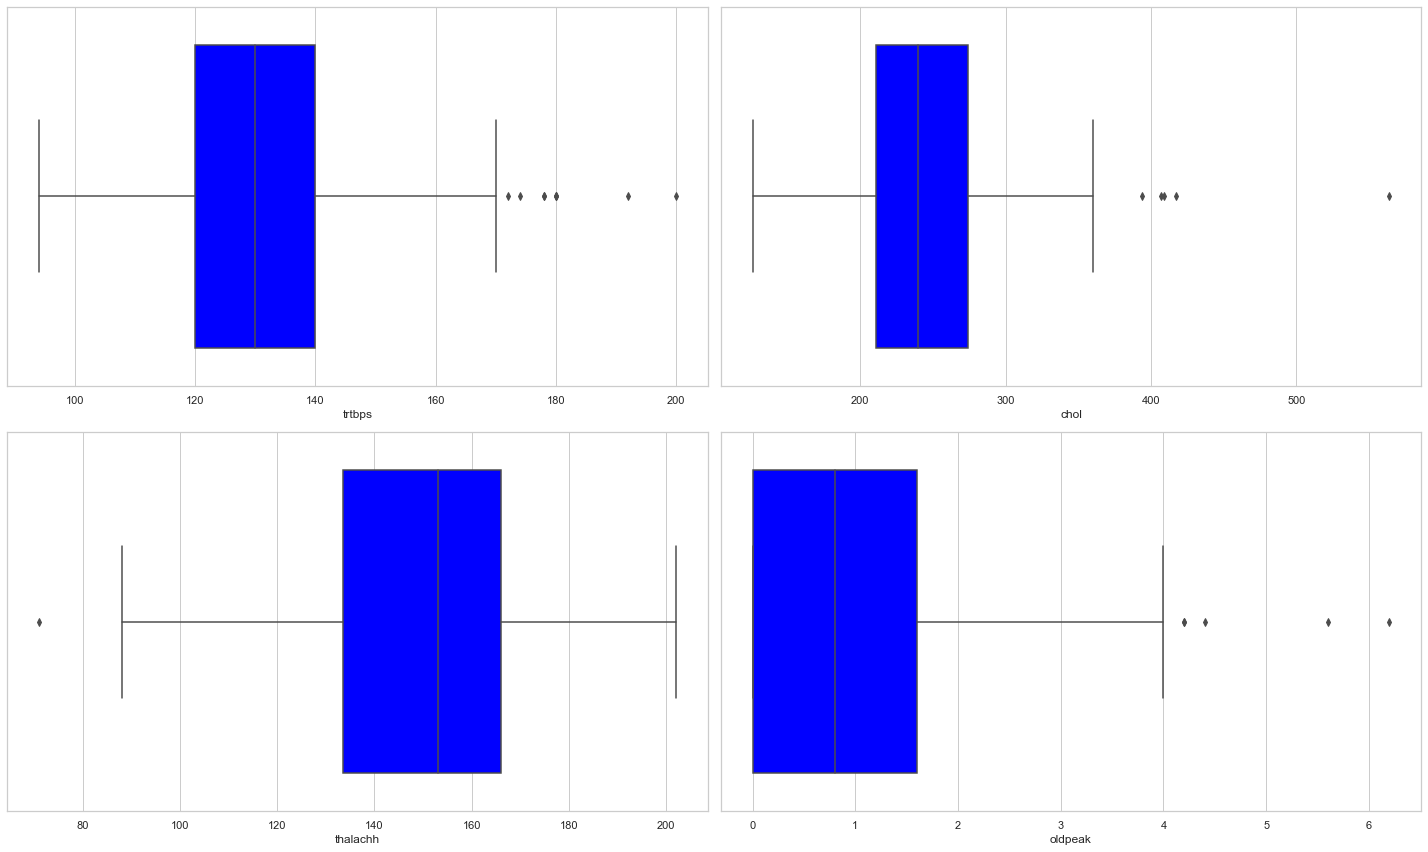

Outliners Present at position: 

trtbps: (array([  8, 101, 110, 152, 195, 203, 223, 228, 241, 248, 260, 266, 292],
      dtype=int64),)
chol: (array([ 28,  85,  96, 220, 246], dtype=int64),)
thalachh: (array([272], dtype=int64),)
oldpeak: (array([101, 204, 221, 250, 291], dtype=int64),)


In [105]:
fig, ax1 = plt.subplots(2,2, figsize=(20,12))
k = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=heart_data ,x=heart_data[continuous_cols[1:][k]],saturation=1,ax=ax1[i][j],color="blue")
        k+=1
plt.tight_layout()
plt.show()

#Display the position of outliners.
print("Outliners Present at position: \n")
print("trtbps: {}".format(np.where(heart_data['trtbps']>165)))
print("chol: {}".format(np.where(heart_data['chol']>360)))
print("thalachh: {}".format(np.where(heart_data['thalachh']<80)))
print("oldpeak: {}".format(np.where(heart_data['oldpeak']>4)))

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import mean_squared_error

In [157]:
heart_data_input = heart_data.drop("output",axis = 'columns')
heart_data_output = heart_data["output"]

In [158]:
print(heart_data_input.shape)
print(heart_data_output.shape)

(303, 13)
(303,)


In [159]:


X_train,X_test,Y_train,Y_test=train_test_split(heart_data_input,heart_data_output,test_size=0.2,random_state=65) 



In [160]:


def compute(Y_pred,Y_test):
    #Output plot
    plt.figure(figsize=(12,6))
    plt.scatter(range(len(Y_pred)),Y_pred,color="yellow",lw=5,label="Predictions")
    plt.scatter(range(len(Y_test)),Y_test,color="red",label="Actual")
    plt.title("Prediction Values vs Real Values")
    plt.legend()
    plt.show()

    cm=confusion_matrix(Y_test,Y_pred)
    class_label = ["High-risk", "Low-risk"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    #Calculate Metrics
    acc=accuracy_score(Y_test,Y_pred)
    mse=mean_squared_error(Y_test,Y_pred)
    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {} %\nMean Square Error: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore,3), round((acc*100),3), round((mse),3)))

In [161]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

Execution time of model: 0.01s
SVC accuracy : 70.49
y Prediction: [1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0]


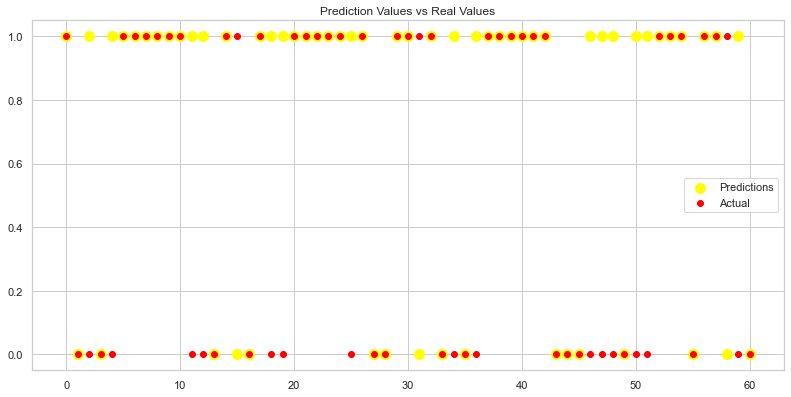

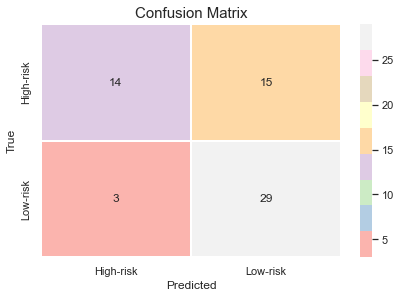

Precision: 0.659 
Recall: 0.906 
F1-Score: 0.763 
Accuracy: 70.492 %
Mean Square Error: 0.295


In [166]:
# Suport Vector Machine
start_svm = time.time()
model_svm=SVC(kernel="rbf")
model_svm.fit(X_train,Y_train)
end_svm = time.time()


Y_pred_svm =model_svm.predict(X_test)
model_Log_time = end_svm - start_svm
model_svm_accuracy=round(accuracy_score(Y_test,Y_pred_svm), 4)*100 # Accuracy

print("Execution time of model: {:.2f}s".format(end_svm - start_svm))
print(f"SVC accuracy : {model_svm_accuracy}")
print(f"y Prediction: {Y_pred_svm}")

# #Plot and compute metrics
compute(Y_pred_svm,Y_test)

Execution time of model: 1.20s
Random Forest Classificer accuracy : 93.44
y Prediction: [1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0]


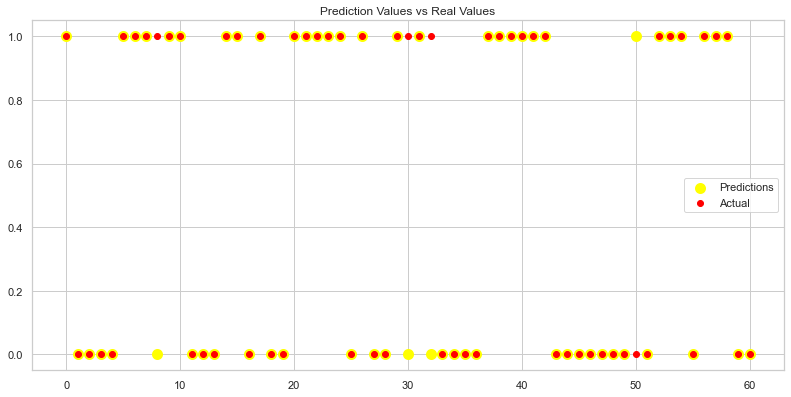

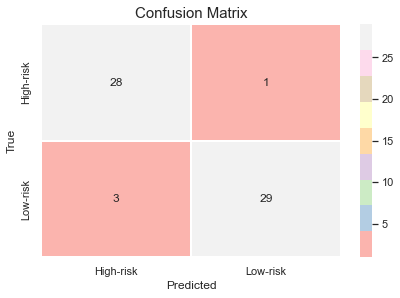

Precision: 0.967 
Recall: 0.906 
F1-Score: 0.935 
Accuracy: 93.443 %
Mean Square Error: 0.066


In [163]:
#Build Random Forest Classifier Model
rand_forest_start=time.time()

model_RF = RandomForestClassifier(n_estimators=300,criterion="gini",random_state=5,max_depth=100)
model_RF.fit(X_train,Y_train)

rand_forest_end=time.time()

Y_pred_rand_forest =model_RF.predict(X_test)
model_RF_accuracy=round(accuracy_score(Y_test,Y_pred_rand_forest), 4)*100 # Accuracy

print("Execution time of model: {:.2f}s".format(rand_forest_end - rand_forest_start))
print(f"Random Forest Classificer accuracy : {model_RF_accuracy}")
print(f"y Prediction: {Y_pred_rand_forest}")
compute(Y_pred_rand_forest,Y_test)

Execution time of model: 0.05s
Greadient Boosting accuracy : 91.8
y Prediction: [1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0]


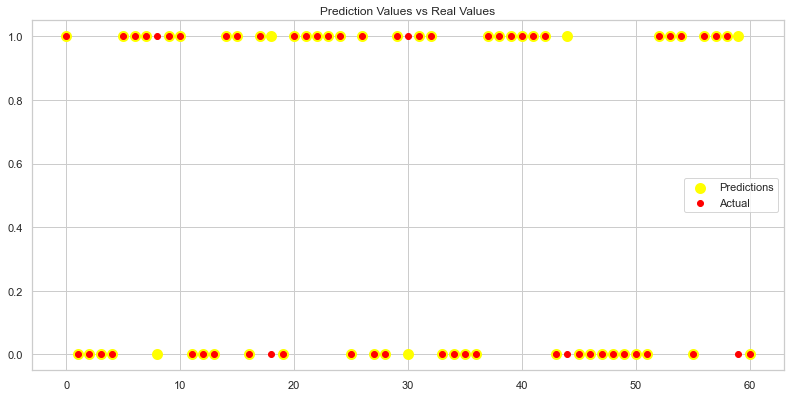

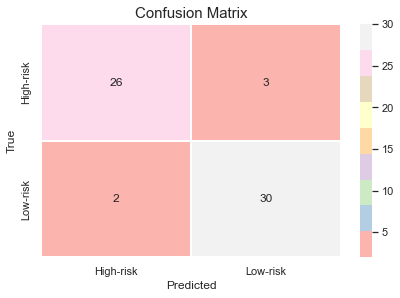

Precision: 0.909 
Recall: 0.938 
F1-Score: 0.923 
Accuracy: 91.803 %
Mean Square Error: 0.082


In [164]:
#Build Gradient Boosting Classifier Model
gb_start=time.time()

model_GB= GradientBoostingClassifier(random_state=10,n_estimators=20,learning_rate=0.29,loss="deviance")
model_GB.fit(X_train,Y_train)

gb_end=time.time()
Y_pred_gb = model_GB.predict(X_test)
model_GB_accuracy=round(accuracy_score(Y_test,Y_pred_gb), 4)*100 # Accuracy

print("Execution time of model: {:.2f}s".format(gb_end - gb_start))
print(f"Greadient Boosting accuracy : {model_GB_accuracy}")
print(f"y Prediction: {Y_pred_gb}")
compute(Y_pred_gb,Y_test)

In [171]:
print("Execution time of Suport Vector Machine model: {:.2f}s".format(end_svm - start_svm))
print("Execution time of Random Forest Classifier model: {:.2f}s".format(rand_forest_end - rand_forest_start))
print("Execution time of Gradient Boosting Classifier model: {:.2f}s".format(gb_end - gb_start))
print("Accuracy of Suport Vector Machine model: {:.2f}%".format(accuracy_score(Y_test,Y_pred_svm)*100))
print("Accuracy of Random Forest Clasifier model: {:.2f}%".format(accuracy_score(Y_test,Y_pred_rand_forest)*100))
print("Accuracy of Gradient Boosting Classifier model: {:.2f}%".format(accuracy_score(Y_test,Y_pred_gb)*100))


Execution time of Suport Vector Machine model: 0.01s
Execution time of Random Forest Classifier model: 1.20s
Execution time of Gradient Boosting Classifier model: 0.05s
Accuracy of Suport Vector Machine model: 70.49%
Accuracy of Random Forest Clasifier model: 93.44%
Accuracy of Gradient Boosting Classifier model: 91.80%


We started off by understanding the columns of the Heart Attack dataset and performing EDA on the it.
The dataset didn't mention which label (0 or 1) stood for which gender, hence we also found that with a little extra research.
We then preprocessed the data based on the correlation and outliners.
The preprocessed data was used to train 9 ML models who's accuracy and execution time was stored and later compare the models. 

References: 
https://www.statisticshowto.com/statistics-basics/find-outliers/ 
https://www.scribbr.com/statistics/outliers/ 
https://seaborn.pydata.org/generated/seaborn.countplot.html 
